In [126]:
!pip install --upgrade gupload
from pydrive.auth import GoogleAuth
from google.colab import auth
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

auth.authenticate_user()
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/final_version_with_avg_distances_and_counts.csv')
for_EDA = pd.read_csv('/content/gdrive/My Drive/FINAL_injuries_post2013.csv')
for_EDA=for_EDA.drop(['Unnamed: 0','Unnamed: 0.1','Acquired'],axis=1)

def injury_history_dur(row):
  injured_part = row['Injury Part']
  injury_history_duration = row[injured_part]
  return injury_history_duration
df['injured body part history'] = df.apply(lambda ro:injury_history_dur(ro), axis=1)
def injury_history_count(row):
  injured_part = row['Injury Part']
  injury_history_count = row[injured_part + '_count']
  return injury_history_count
df['injured body part count'] = df.apply(lambda ro:injury_history_count(ro), axis=1)
df = df[df['Acute-Chronic Workload Ratio']!= 0]

Requirement already up-to-date: gupload in /usr/local/lib/python3.7/dist-packages (1.1.0)
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Season
2013-14    245
2014-15    345
2015-16    297
2016-17    391
2017-18    519
2018-19    547
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


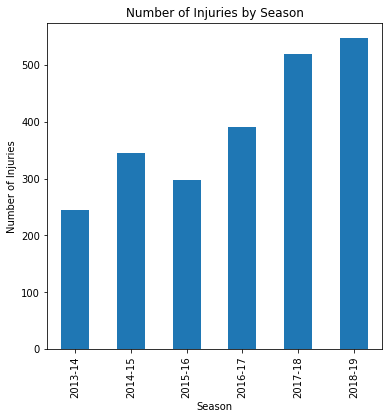

In [127]:
### basic EDA
plt.rcParams["figure.figsize"] = (6,6)

inj_by_season = for_EDA.groupby(['Season']).size()
print(inj_by_season)
inj_by_season_plot = inj_by_season.plot(kind='bar')
inj_by_season_plot.set_ylabel('Number of Injuries')
inj_by_season_plot.set_title('Number of Injuries by Season')
print(inj_by_season_plot)

180
256
222
313
391
431
Season
2013-14    180
2014-15    256
2015-16    222
2016-17    313
2017-18    391
2018-19    431
dtype: int64


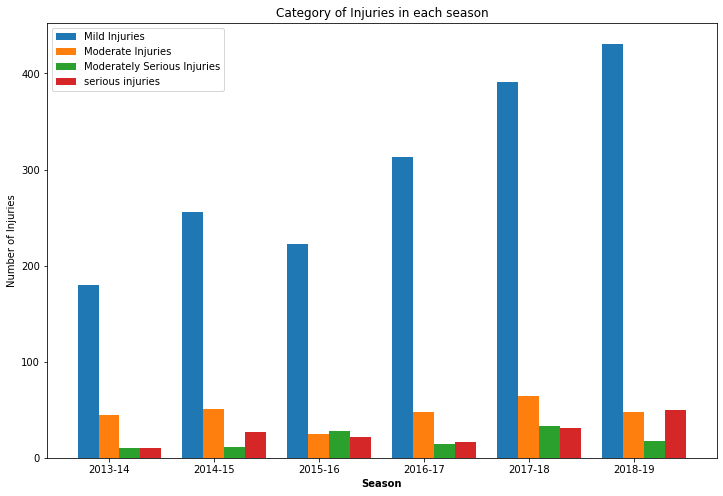

In [128]:
mild_injuries = for_EDA[for_EDA['Injury Duration']<=28]
mildinj_by_season = mild_injuries.groupby(['Season']).size()
moderate_injuries = for_EDA[for_EDA['Injury Duration']> 28]
moderate_injuries = moderate_injuries[moderate_injuries['Injury Duration']<=90]
moderateinj_by_season = moderate_injuries.groupby(['Season']).size()
moderatelyserious_injuries = for_EDA[for_EDA['Injury Duration']> 90]
moderatelyserious_injuries=moderatelyserious_injuries[moderatelyserious_injuries['Injury Duration']<=180]
moderatelysrsinj_by_season = moderatelyserious_injuries.groupby(['Season']).size()
serious_injuries = for_EDA[for_EDA['Injury Duration']>180]
srsinj_by_season = serious_injuries.groupby(['Season']).size()
for i in mildinj_by_season.index:
  print(mildinj_by_season[i])
labels = mildinj_by_season.index
print(mildinj_by_season)
mildinj_by_season = list(mildinj_by_season)
moderateinj_by_season = list(moderateinj_by_season)
moderatelysrsinj_by_season = list(moderatelysrsinj_by_season)
srsinj_by_season = list(srsinj_by_season)
barwidth = .2
r1 = np.arange(len(labels))
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]
r4 = [x + barwidth for x in r3]

plt.rcParams["figure.figsize"] = (12,8)
plt.bar(r1, mildinj_by_season, width=barwidth, label='Mild Injuries')
plt.bar(r2, moderateinj_by_season, width=barwidth, label='Moderate Injuries')
plt.bar(r3, moderatelysrsinj_by_season, width=barwidth, label='Moderately Serious Injuries')
plt.bar(r4, srsinj_by_season, width=barwidth, label='serious injuries')
# Add xticks on the middle of the group bars
plt.xlabel('Season', fontweight='bold')
plt.xticks([r + barwidth for r in range(len(labels))], labels)

plt.ylabel('Number of Injuries')
plt.title('Category of Injuries in each season')

plt.legend()
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


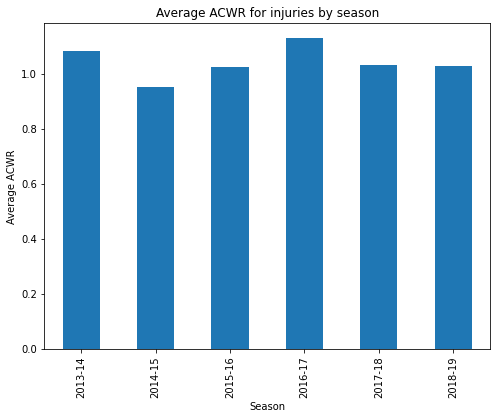

In [129]:
def get_range(row):
  awcr = row['Acute-Chronic Workload Ratio']
  mask1 = awcr<=0.5
  mask2 = awcr <=1
  mask3 = awcr <= 1.5
  mask4 = awcr>1.5
  if mask1:
    return '(0.0, 0.5]'
  elif (not mask1) and mask2:
    return '(0.5, 1]'
  elif (not mask2) and mask3:
    return '(1, 1.5]'
  elif mask4:
    return '(1.5, 4]'
df_copy = df.copy()
plt.rcParams["figure.figsize"] = (8,6)
df_copy['range'] = df_copy.apply(lambda ro: get_range(ro), axis=1)
inj_by_season = df_copy.groupby(['Season'])['Acute-Chronic Workload Ratio'].mean()
acwr_inj_by_season_plot = inj_by_season.plot(kind='bar')
acwr_inj_by_season_plot.set_title('Average ACWR for injuries by season')
acwr_inj_by_season_plot.set_ylabel('Average ACWR')

print(acwr_inj_by_season_plot)

AxesSubplot(0.125,0.125;0.775x0.755)


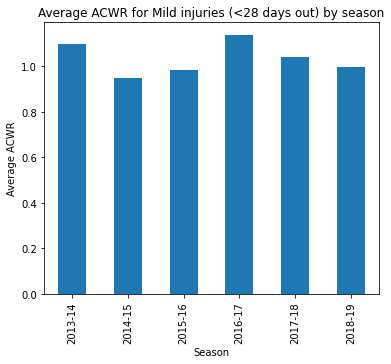

In [130]:
df_copy = df.copy()
plt.rcParams["figure.figsize"] = (6,5)

mild_injuries = df_copy[df_copy['Injury Duration']<=28]
mild_inj_by_season = mild_injuries.groupby(['Season'])['Acute-Chronic Workload Ratio'].mean()
acwr_mild_inj_by_season_plot = mild_inj_by_season.plot(kind='bar')
acwr_mild_inj_by_season_plot.set_ylabel('Average ACWR')
acwr_mild_inj_by_season_plot.set_title('Average ACWR for Mild injuries (<28 days out) by season')

print(acwr_mild_inj_by_season_plot)

AxesSubplot(0.125,0.125;0.775x0.755)


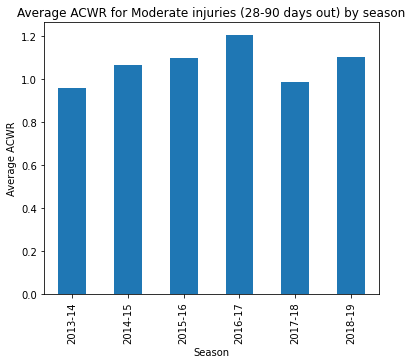

In [131]:
moderate_injuries = df_copy[df_copy['Injury Duration']>28]
moderate_injuries = moderate_injuries[moderate_injuries['Injury Duration']<=90]
moderate_inj_by_season = moderate_injuries.groupby(['Season'])['Acute-Chronic Workload Ratio'].mean()
acwr_moderate_inj_by_season_plot = moderate_inj_by_season.plot(kind='bar')
acwr_moderate_inj_by_season_plot.set_ylabel('Average ACWR')
acwr_moderate_inj_by_season_plot.set_title('Average ACWR for Moderate injuries (28-90 days out) by season')

print(acwr_moderate_inj_by_season_plot)

AxesSubplot(0.125,0.125;0.775x0.755)


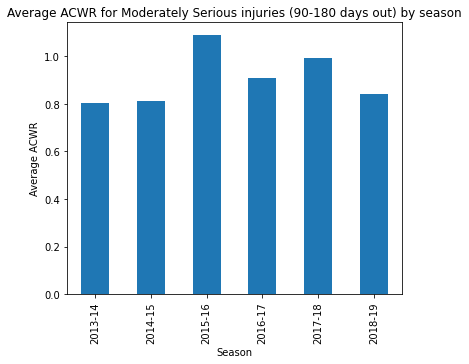

In [132]:
moderately_serious_injuries = df_copy[df_copy['Injury Duration']>90]
moderately_serious_injuries = moderately_serious_injuries[moderately_serious_injuries['Injury Duration']<=180]
moderately_serious_inj_by_season = moderately_serious_injuries.groupby(['Season'])['Acute-Chronic Workload Ratio'].mean()
acwr_moderately_serious_inj_by_season_plot = moderately_serious_inj_by_season.plot(kind='bar')
acwr_moderately_serious_inj_by_season_plot.set_ylabel('Average ACWR')
acwr_moderately_serious_inj_by_season_plot.set_title('Average ACWR for Moderately Serious injuries (90-180 days out) by season')

print(acwr_moderately_serious_inj_by_season_plot)

AxesSubplot(0.125,0.125;0.775x0.755)


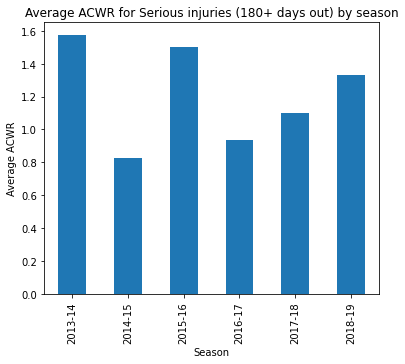

In [133]:
df_copy = df.copy()
serious_injuries = df_copy[df_copy['Injury Duration']>180]
serious_inj_by_season = serious_injuries.groupby(['Season'])['Acute-Chronic Workload Ratio'].mean()
acwr_serious_inj_by_season_plot = serious_inj_by_season.plot(kind='bar')
acwr_serious_inj_by_season_plot.set_ylabel('Average ACWR')
acwr_serious_inj_by_season_plot.set_title('Average ACWR for Serious injuries (180+ days out) by season')

print(acwr_serious_inj_by_season_plot)

AxesSubplot(0.125,0.125;0.775x0.755)


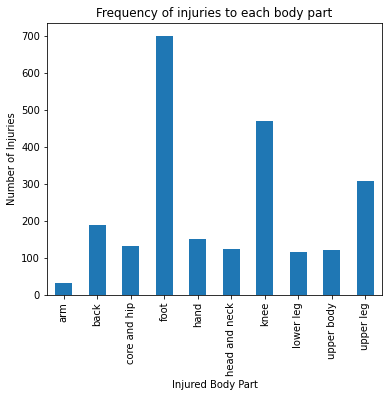

In [134]:
inj_by_part = for_EDA.groupby(['Injury Part']).size()
inj_by_part_plot = inj_by_part.plot(kind='bar')
inj_by_part_plot.set_xlabel('Injured Body Part')
inj_by_part_plot.set_ylabel('Number of Injuries')
inj_by_part_plot.set_title('Frequency of injuries to each body part')

print(inj_by_part_plot)

AxesSubplot(0.125,0.125;0.775x0.755)


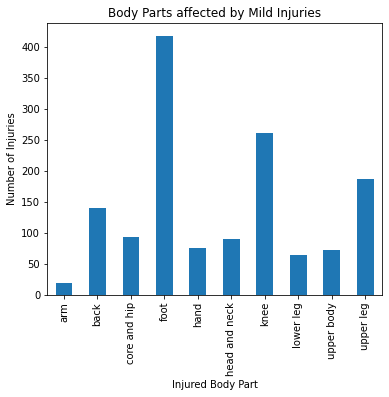

In [135]:
inj_by_part = mild_injuries.groupby(['Injury Part']).size()
inj_by_part_plot = inj_by_part.plot(kind='bar')
inj_by_part_plot.set_xlabel('Injured Body Part')
inj_by_part_plot.set_ylabel('Number of Injuries')
inj_by_part_plot.set_title('Body Parts affected by Mild Injuries')

print(inj_by_part_plot)

AxesSubplot(0.125,0.125;0.775x0.755)


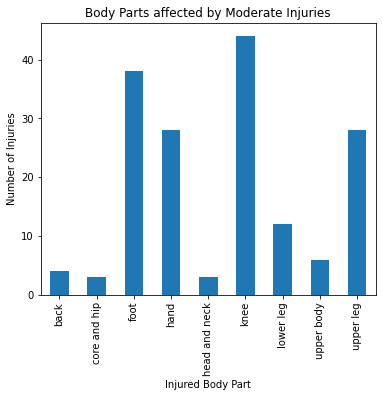

In [136]:
inj_by_part = moderate_injuries.groupby(['Injury Part']).size()
inj_by_part_plot = inj_by_part.plot(kind='bar')
inj_by_part_plot.set_xlabel('Injured Body Part')
inj_by_part_plot.set_ylabel('Number of Injuries')
inj_by_part_plot.set_title('Body Parts affected by Moderate Injuries')

print(inj_by_part_plot)

AxesSubplot(0.125,0.125;0.775x0.755)


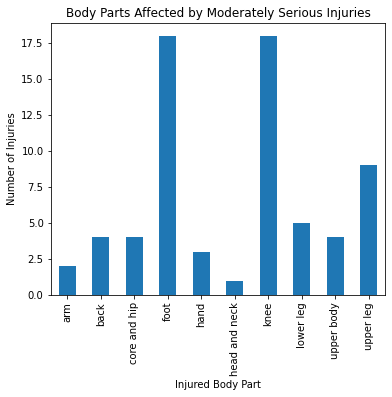

In [137]:
inj_by_part = moderately_serious_injuries.groupby(['Injury Part']).size()
inj_by_part_plot = inj_by_part.plot(kind='bar')
inj_by_part_plot.set_xlabel('Injured Body Part')
inj_by_part_plot.set_ylabel('Number of Injuries')
inj_by_part_plot.set_title('Body Parts Affected by Moderately Serious Injuries')

print(inj_by_part_plot)

AxesSubplot(0.125,0.125;0.775x0.755)


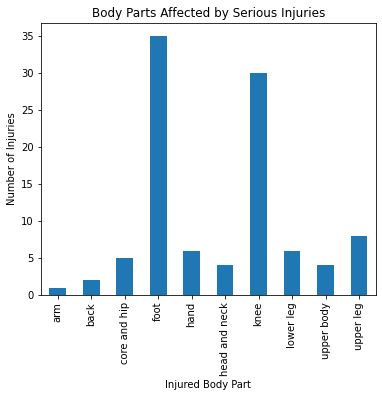

In [138]:
inj_by_part = serious_injuries.groupby(['Injury Part']).size()
inj_by_part_plot = inj_by_part.plot(kind='bar')
inj_by_part_plot.set_xlabel('Injured Body Part')
inj_by_part_plot.set_ylabel('Number of Injuries')
inj_by_part_plot.set_title('Body Parts Affected by Serious Injuries')
print(inj_by_part_plot)

AxesSubplot(0.125,0.125;0.775x0.755)


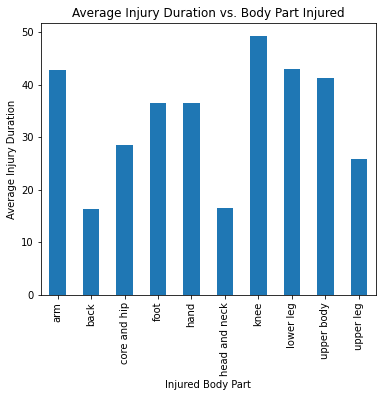

In [139]:
injdur_by_part = for_EDA.groupby(['Injury Part'])['Injury Duration'].mean()
injdur_by_part_plot = injdur_by_part.plot(kind='bar')
injdur_by_part_plot.set_xlabel('Injured Body Part')
injdur_by_part_plot.set_ylabel('Average Injury Duration')
injdur_by_part_plot.set_title('Average Injury Duration vs. Body Part Injured')

print(injdur_by_part_plot)

AxesSubplot(0.125,0.125;0.775x0.755)


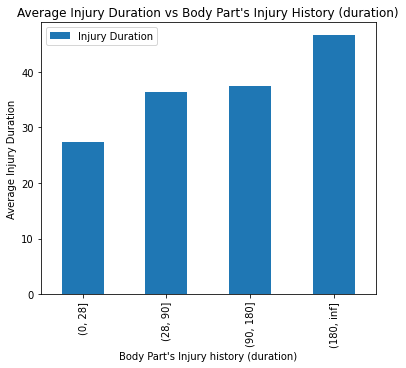

In [140]:
def injury_history_dur(row):
  injured_part = row['Injury Part']
  injury_history_duration = row[injured_part]
  return injury_history_duration
df['injured body part history'] = df.apply(lambda ro:injury_history_dur(ro), axis=1)

bins = [0,28,90,180,710]

def get_range(row):
  awcr = row['injured body part history']
  mask1 = awcr<=28
  mask2 = awcr <=90
  mask3 = awcr <= 180
  mask4 = awcr>180
  if mask1:
    return '(0, 28]'
  elif (not mask1) and mask2:
    return '(28, 90]'
  elif (not mask2) and mask3:
    return '(90, 180]'
  elif mask4:
    return '(180, inf]'
df_copy = df.copy()
df_copy['range'] = df_copy.apply(lambda ro: get_range(ro), axis=1)
inj_hist_duration = df_copy.groupby(['range'])['Injury Duration'].mean()
inj_hist_duration = inj_hist_duration.to_frame()
inj_hist_duration = inj_hist_duration.reset_index()
inj_hist_duration_copy = inj_hist_duration.copy()
inj_hist_duration.iloc[1],inj_hist_duration.iloc[2], inj_hist_duration.iloc[3] = inj_hist_duration_copy.iloc[2],inj_hist_duration_copy.iloc[3],inj_hist_duration_copy.iloc[1]
inj_hist_duration_plot = inj_hist_duration.plot(x = 'range', y = 'Injury Duration',kind='bar',sort_columns=False)
inj_hist_duration_plot.set_ylabel('Average Injury Duration')
inj_hist_duration_plot.set_xlabel('''Body Part's Injury history (duration)''')
inj_hist_duration_plot.set_title('''Average Injury Duration vs Body Part's Injury History (duration)''')

print(inj_hist_duration_plot)


        index  Injury Duration
0     (0, 28]             1425
1    (28, 90]              166
2   (90, 180]               68
3  (180, 710]              101


Text(0.5, 1.0, "Number of Injuries vs Body Part's Injury History (duration)")

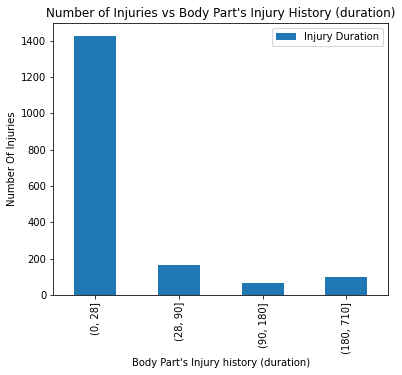

In [172]:
df_copy = df.copy()
bins = [0,28,90,180,710]
inj_hist_count=pd.cut(df_copy['Injury Duration'],bins=bins).value_counts()
inj_hist_count=inj_hist_count.to_frame()
inj_hist_count=inj_hist_count.reset_index()
inj_hist_count_copy = inj_hist_count.copy()
inj_hist_count.iloc[2], inj_hist_count.iloc[3] = inj_hist_count_copy.iloc[3],inj_hist_count_copy.iloc[2]
print(inj_hist_count)
inj_hist_count_plot = inj_hist_count.plot(x = 'index', y = 'Injury Duration', kind='bar',sort_columns=True)
inj_hist_count_plot.set_ylabel('Number Of Injuries')
inj_hist_count_plot.set_xlabel('''Body Part's Injury history (duration)''')
inj_hist_count_plot.set_title('''Number of Injuries vs Body Part's Injury History (duration)''')


Text(0.5, 1.0, "Number of Injuries vs Body Part's Injury History (count)")

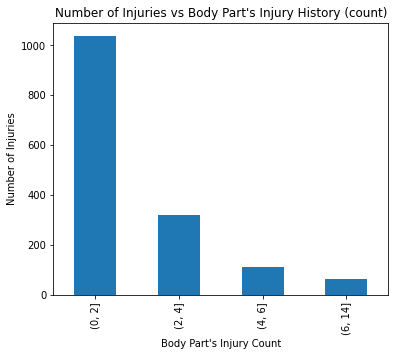

In [21]:
def injury_history_count(row):
  injured_part = row['Injury Part']
  injury_history_count = row[injured_part + '_count']
  return injury_history_count
df['injured body part count'] = df.apply(lambda ro:injury_history_count(ro), axis=1)
bins = [0,2,4,6,14]


injhist_count = pd.cut(df['injured body part count'],bins=bins).value_counts()

injhist_count_plot = injhist_count.plot(kind='bar',sort_columns=True)

injhist_count_plot.set_ylabel('Number of Injuries')
injhist_count_plot.set_xlabel('''Body Part's Injury Count''')
injhist_count_plot.set_title('''Number of Injuries vs Body Part's Injury History (count)''')


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


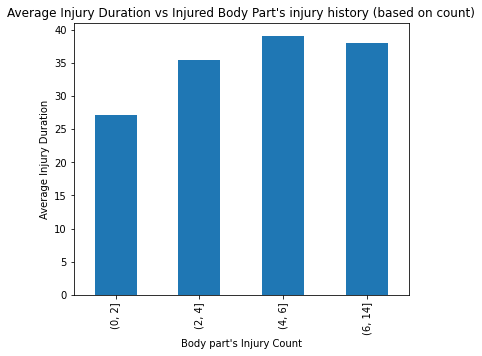

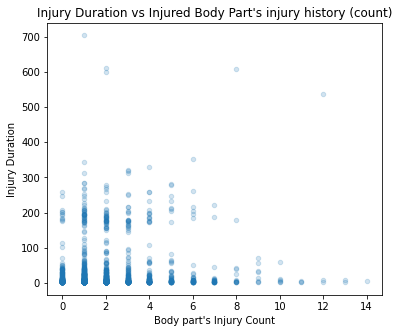

In [180]:
def get_range(row):
  awcr = row['injured body part count']
  mask1 = awcr<=2
  mask2 = awcr <=4
  mask3 = awcr <= 6
  mask4 = awcr>6
  if mask1:
    return '(0, 2]'
  elif (not mask1) and mask2:
    return '(2, 4]'
  elif (not mask2) and mask3:
    return '(4, 6]'
  elif mask4:
    return '(6, 14]'

df['range'] = df.apply(lambda ro: get_range(ro), axis=1)
part_inj_history = df.groupby(['range'])['Injury Duration'].mean()
part_inj_history_plot = part_inj_history.plot(kind='bar')
part_inj_history_plot.set_ylabel('Average Injury Duration')
part_inj_history_plot.set_xlabel('''Body part's Injury Count''')
part_inj_history_plot.set_title('''Average Injury Duration vs Injured Body Part's injury history (count)''')

print(part_inj_history_plot)

scatter_count = df.plot(x='injured body part count',y = 'Injury Duration',kind='scatter', alpha=0.2)
scatter_count.set_ylabel('Injury Duration')
scatter_count.set_xlabel('''Body part's Injury Count''')
scatter_count.set_title('''Injury Duration vs Injured Body Part's injury history (count)''')

print(scatter_count)

AxesSubplot(0.125,0.125;0.775x0.755)


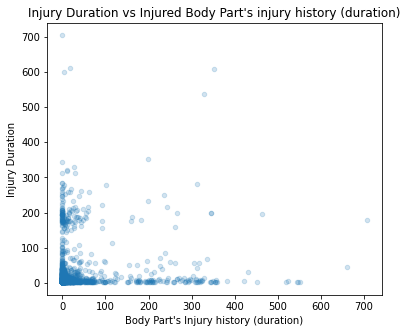

In [181]:
scatter_count = df.plot(x='injured body part history',y = 'Injury Duration',kind='scatter', alpha=0.2)
scatter_count.set_ylabel('Injury Duration')
scatter_count.set_xlabel('''Body Part's Injury history (duration)''')
scatter_count.set_title('''Injury Duration vs Injured Body Part's injury history (duration)''')

print(scatter_count)